# Logistic Regression Explained

Logistic Regression is a statistical model that was developed in the field of statistics for binary classification problems. It gives an output of either 0 or 1.

It was developed in order to calculate the growing population rate within an enviroment that has limited resources.

Logistic Regression gets its name from its core function which is called as either the logistic function or the sigmoid function. The logistic function is an S-shaped curve that can take any real number and map it unto a value between 0 and 1 but never at those limits.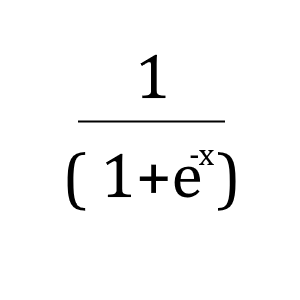

**Representation Behind Logistic Regression**

It is just like the linear regression where the equation is its representation, the input values (x) are combined linearly using weights to predict an output (y). However the key difference is the predicted output will give us a binary value 0 or 1 rather than a continuous numerical value. The logistic regression equation can be expressed as the following: 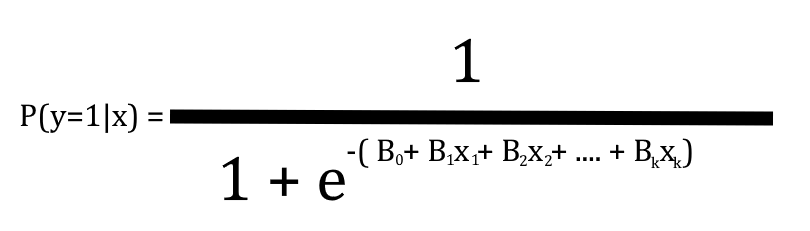

*   P(y = 1|x) represent the probability of the positive class.
*   The betas are the model's coefficients (weights) learned during training, while B0 is the bias
*   The (x)s are the input features.

**Logistic Regression Predicts Probabilities**

Logistic regression models the probability of the default class (e.g the 1st class). For example, if we modelling people's sex as male or female from their height, then we can make the default class a male and the other class as female. Logistic regression will then predict that a given person is male baased off their height. This can then be written as **P ( y = 1 | height )**, where 1 is male and 0 is for female.

In conclusion, logistic regression predicts probabilities. It is used for classification and estimating probabilities. It is a powerful classification technique technique that estimates the likelihood of an input belonging to a partificular class.

**Learning the Logistic Regression**

In logistic regression, we use the maximum likelihood to estimate the coefficients (beta values B) from our training input. If our model is predicting a value very close to 1 for the default class and a value close to 0 for the other class, then it means we are getting better coefficients.

*The intuition for maximum likelihood* for logistic regression states this:

"The search procedure seeks values for the coefficients that minimizes the errors in the probabilities predicted by the model."

# Logistic Regression Code

In [21]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i >= 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

bc_data = load_breast_cancer()

X, y = bc_data.data, bc_data.target

#display(bc_data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

classification = LogisticRegression(lr=0.01)
classification.fit(X_train, y_train)
predictions = classification.predict(X_test)

def accuracy(predictions, y_test):
    return np.sum(predictions == y_test) / len(y_test)

acc = accuracy(predictions, y_test)
print(acc)

display(predictions[0:10])

0.9210526315789473


<ipython-input-21-2fce6811a2c1>:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[1, 1, 1, 1, 1, 1, 0, 1, 0, 0]

**The Algorithm**

**Developing the Gradient Descent**

1. Within the init function, initialize the learning rate, and the number of iterations. The weight and bias should be set a None.

2. Within the fit, which is also gradient descent algorithm, do the following:

	I. Set the number of features.

	II. Set the initial weights and bias as 0.

3. After doing the second step, with the same fit, develop a for loop that will:

	I. Receive the predictions from the sigmoid function.

	II. Update gradients of the cost function.
  
	III. Update the value for the weights and bias by multiplying the learning rate with the gradients of the cost functions from II.

4. Create a function that will return a binary number of either 1 or 0 based off the results from the predictions given by the sigmoid function

**Within the Global Function**

1. Receive the data.

2. Set the features (x) and target variables (y).

3. Perform the train and test set split from the features (x) and the target variable (y)

4. Fit the X_train and y_train data so that they will go through the training of the classification model.

5. Use the fitted model to predict the labels for the test data of X_test. Labels meaning the target values or categories that the model is trying to predict.

6. Calculate the accuracy.
